In [41]:
#Import the libraries to work with the datasets
import pandas as pd
import numpy as np
import matplotlib as plt

# Data Cleaning & Analysis 
- Handling null values, fixing data types, data inconsistencies
- EDA, understanding distributions, outliers, relationships of features with target variable
- Feature Selection using correlation analysis, ANOVA tests, F-test, etc.
  

In [42]:
#1. import data
math = pd.read_csv("./student-mat.csv", sep=';', header=0)
por = pd.read_csv("./student-por.csv", sep=';', header=0)

In [43]:
#2. check the structure of the datasets
print(por.head)
print(por.columns)
print(por.info)
print(por.describe())



print(math.head)
print(math.columns)
print(math.info)
print(math.describe())


<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

In [40]:
#check the column names
por.head
por.columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [45]:
# Check if the columns are the same
if list(math) == list(por):
    print("The columns are the same.")
else:
    print("The columns are different.")

The columns are the same.


In [ ]:
#check for the Null(NA) values
print(math.isnull().sum())
print(por.isnull().sum())
#there are no missing values

In [47]:
#4. merge data sets for math and portuguese
# a snip from the text file: Additional note: there are several (382) students that belong to both datasets.
d3 = pd.merge(
    math, 
    por, 
    on=["school", "sex", "age", "address", "famsize", 
        "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", 
        "reason", "nursery", "internet"]
)
print(len(d3))
print(d3.columns) 

382
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')


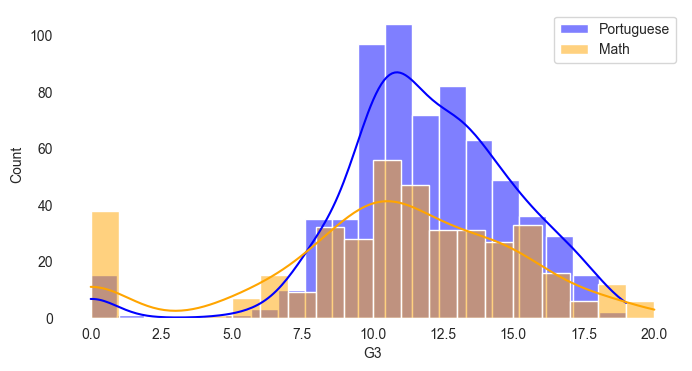

In [48]:
# 5. EDA
por.columns

#import the lib
#pip install matplotlib
#pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]= 8,4
import warnings
warnings.filterwarnings('ignore')

## check how the G3(final grade) is distrubuted
sns.histplot(por["G3"], bins=20, color='blue', label='Portuguese', kde=True)
sns.histplot(math["G3"], bins=20, color='orange', label='Math', kde=True)
plt.legend()
plt.show()

#data is normally distrubuted, almost a bell shape but slighlty  left skewed. 


# Outlier detection

In [49]:
# find the outliers with IQR
Q1 = math.G3.quantile(0.25)  # First quartile
Q3 = math.G3.quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile range

# Calculate outlier thresholds
lower_bound = Q1 - 1.5 * IQR #everything below will be an outliers # -1
upper_bound = Q3 + 1.5 * IQR #everything above will be an outliers # 23

print(lower_bound, upper_bound)
outliers = math[(math.G3 < lower_bound) | (math.G3 > upper_bound)]
print("Outliers:\n", outliers)

print("lower bound: " + str(lower_bound), "upper bound: " + str(upper_bound))
outliers = math[(por.G3 < lower_bound) | (math.G3 > upper_bound)]
print("Outliers:\n", outliers)
#there are no outliers for the math, since the data is within the -1 and 23


-1.0 23.0
Outliers:
 Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]
lower bound: -1.0 upper bound: 23.0
Outliers:
 Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


In [50]:
# find the outliers with IQR
Q1 = por.G3.quantile(0.25)  # First quartile
Q3 = por.G3.quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile range

# Calculate outlier thresholds
lower_bound = Q1 - 1.5 * IQR #everything below will be an outliers # -1
upper_bound = Q3 + 1.5 * IQR #everything above will be an outliers # 23

print(lower_bound, upper_bound)
outliers = por[(por.G3 < lower_bound) | (por.G3 > upper_bound)]
print("Outliers:\n", outliers)

print("lower bound: " + str(lower_bound), "upper bound: " + str(upper_bound))
outliers = por[(por.G3 < lower_bound) | (por.G3 > upper_bound)]
print("Outliers:\n", outliers)
#there are no outliers for the math, since the data is within the -1 and 23


4.0 20.0
Outliers:
     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
163     GP   M   18       U     LE3       T     1     1     other     other   
172     GP   M   16       U     GT3       T     3     3     other  services   
440     MS   M   16       U     GT3       T     1     1   at_home  services   
519     MS   M   16       R     GT3       T     2     1     other  services   
563     MS   M   17       U     GT3       T     2     2     other     other   
567     MS   M   18       R     GT3       T     3     2  services     other   
583     MS   F   18       R     GT3       T     2     2     other     other   
586     MS   F   17       U     GT3       T     4     2   teacher  services   
597     MS   F   18       R     GT3       T     2     2   at_home     other   
603     MS   F   18       R     LE3       A     4     2   teacher     other   
605     MS   F   19       U     GT3       T     1     1   at_home  services   
610     MS   F   19       R     

In [51]:
#detect the outliers using the Z-score
por["zscore"] = (por.G3 - por.G3.mean())/por.G3.std()
por.zscore.head()

0   -0.280441
1   -0.280441
2    0.029093
3    0.648163
4    0.338628
Name: zscore, dtype: float64

In [52]:
#which rows are outliers
por[(por.zscore < -3) | por.zscore > 3]

# so with z-score there is no outlier in both datasets

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,zscore


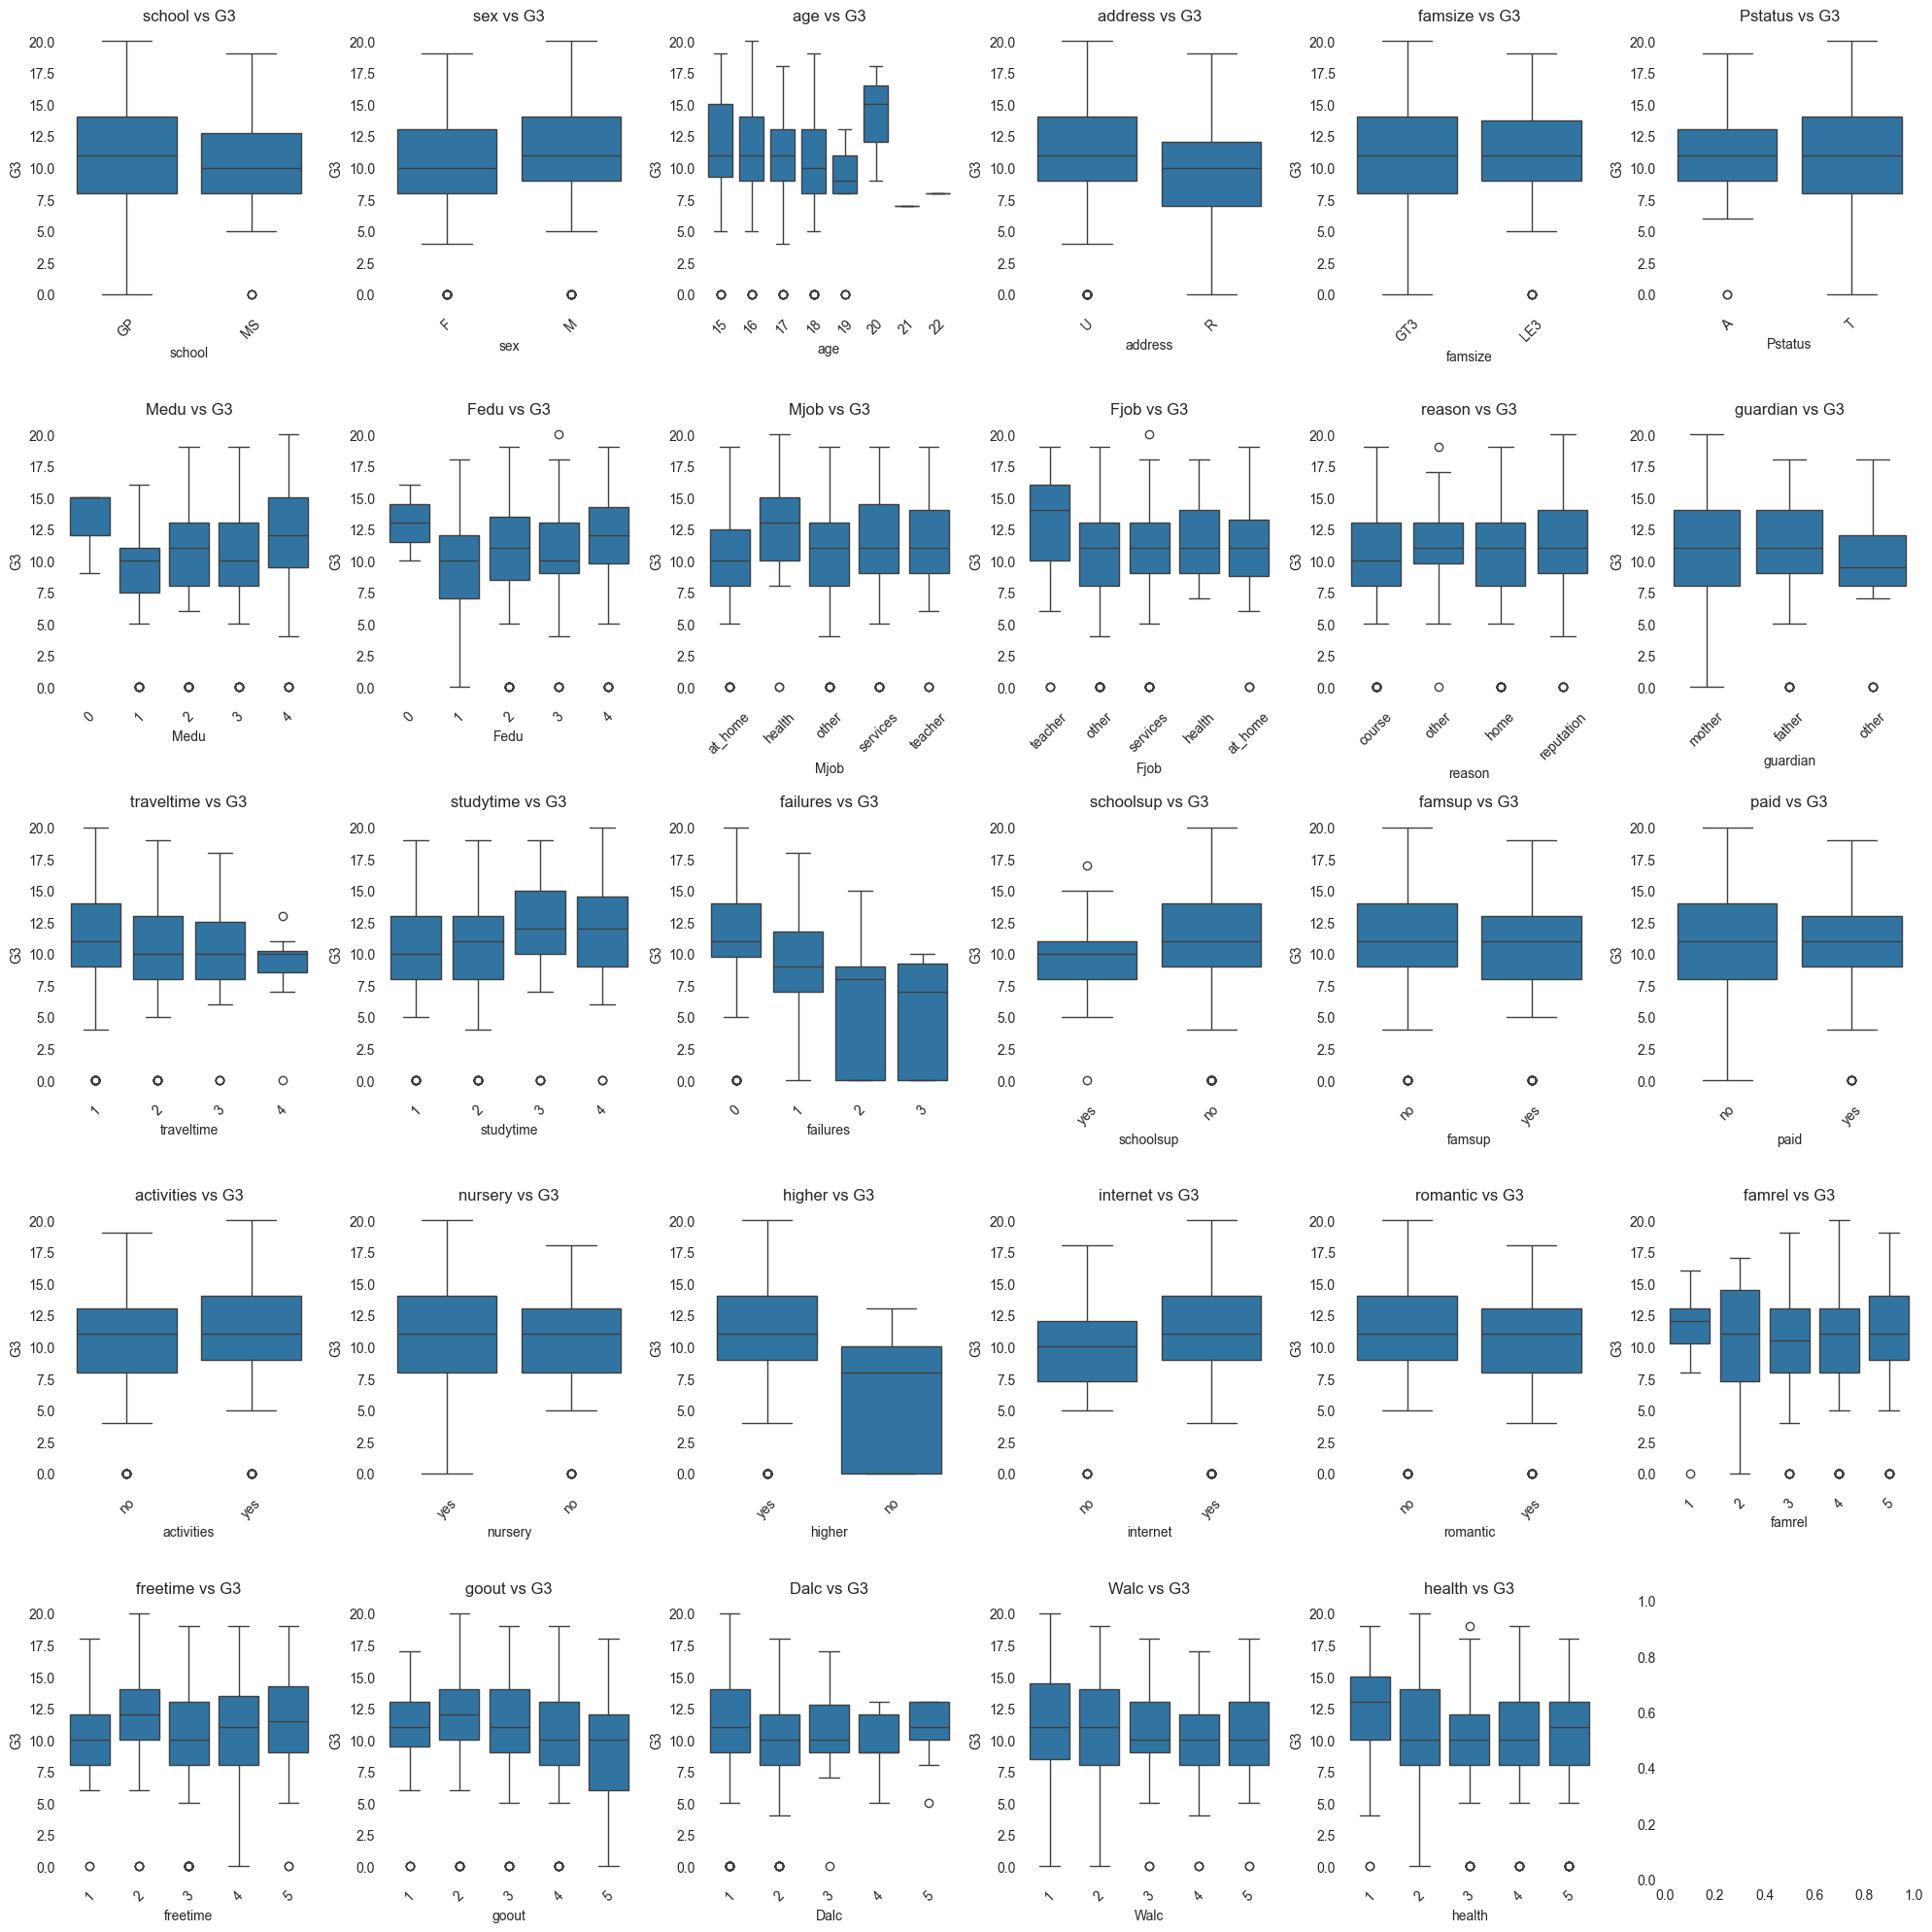

In [33]:
# Math: relationship of the G3 with other features: traveltime, studytime, absences, traveltime and etc. 


import seaborn as sns
import matplotlib.pyplot as plt


# Set the style for the plots
sns.set_style("dark", {"axes.facecolor": "white"})

# Set up the figure and axes grid (e.g., 4x4 grid)
f, axes = plt.subplots(5, 6, figsize=(20, 20))


columns = math.columns  # Get the list of all column names

# List of columns to exclude from plotting
excluded_columns = ['absences', 'G1', 'G2', "G3"]  # These columns won't be plotted

# Filter out the excluded columns from the list of columns to plot
plot_columns = [col for col in columns if col not in excluded_columns]

# Flatten the 2D axes array to make indexing easier
axes = axes.flatten()

# Loop through the filtered columns and create a boxplot for each
for i, col in enumerate(plot_columns):
    # Create a boxplot for each column against 'G3'
    sns.boxplot(data=math, x=col, y="G3", ax=axes[i])

    # Set the title for each plot
    axes[i].set_title(f'{col} vs G3')

    # Optional: Rotate x-ticks for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plots
plt.show()

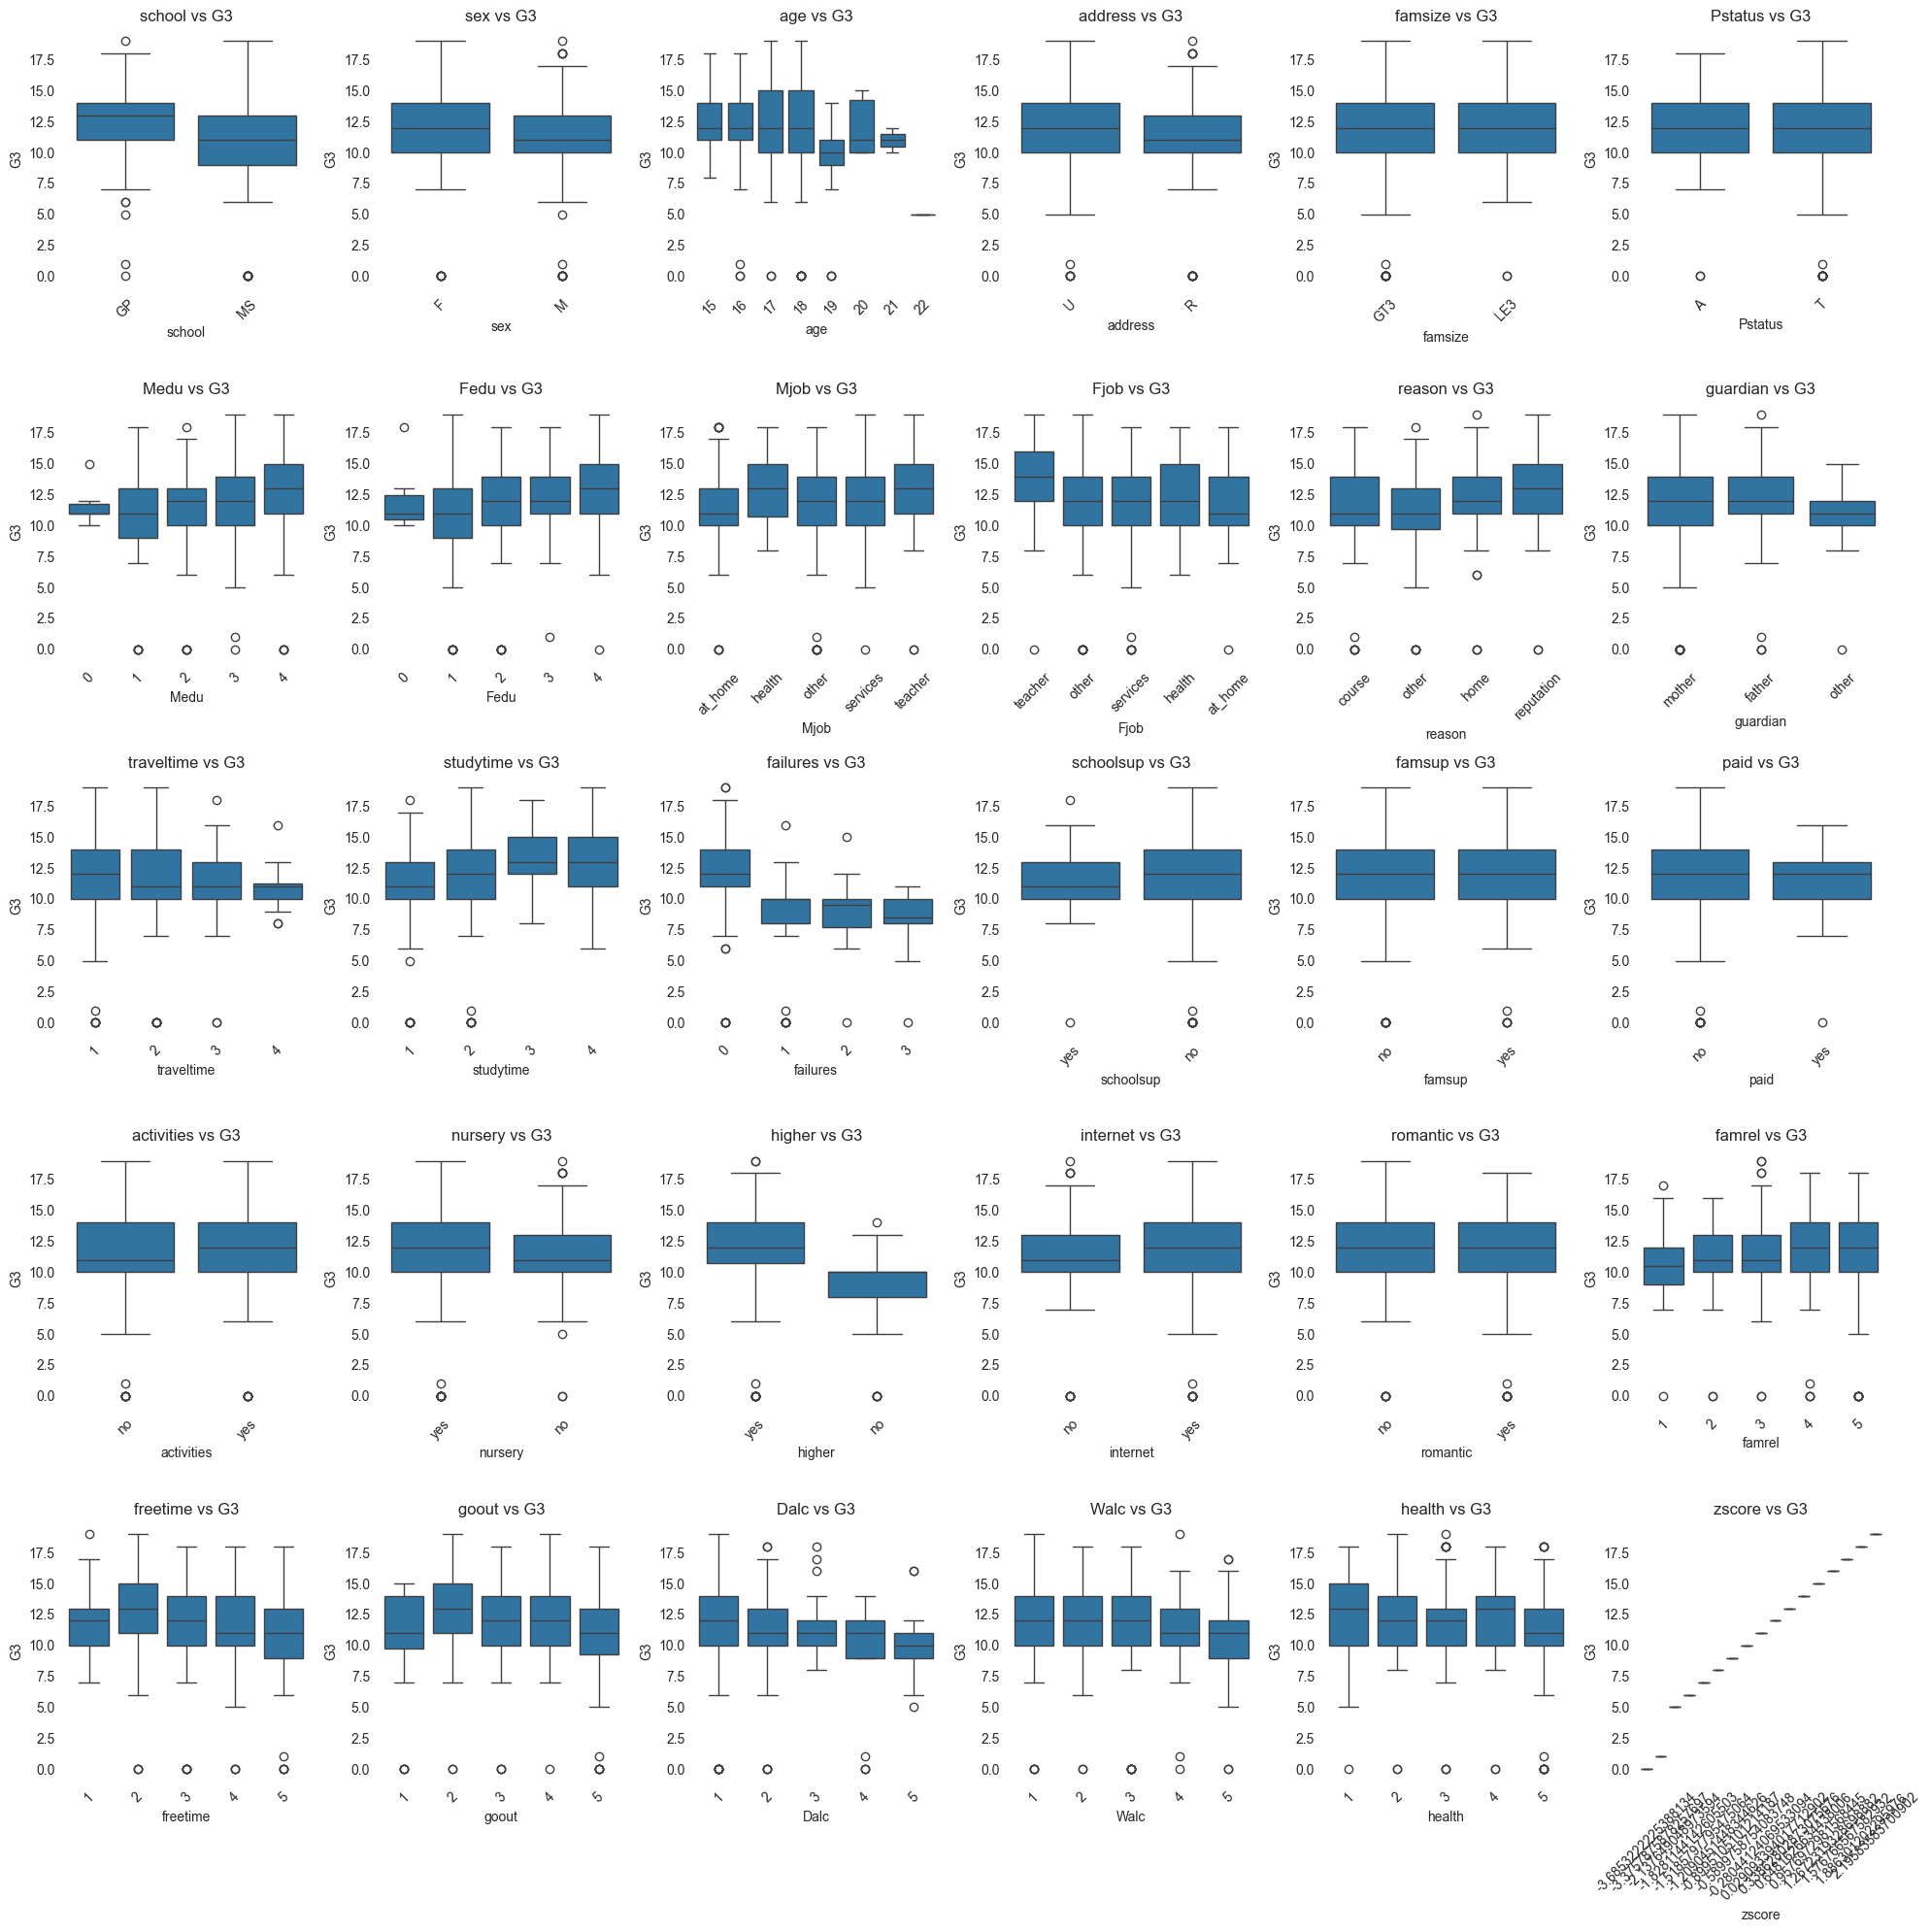

In [34]:
# Math: relationship of the G3 with other features: traveltime, studytime, absences, traveltime and etc. 


import seaborn as sns
import matplotlib.pyplot as plt


# Set the style for the plots
sns.set_style("dark", {"axes.facecolor": "white"})

# Set up the figure and axes grid (e.g., 4x4 grid)
f, axes = plt.subplots(5, 6, figsize=(20, 20))


columns = por.columns  # Get the list of all column names

# List of columns to exclude from plotting
excluded_columns = ['absences', 'G1', 'G2', "G3"]  # These columns won't be plotted

# Filter out the excluded columns from the list of columns to plot
plot_columns = [col for col in columns if col not in excluded_columns]

# Flatten the 2D axes array to make indexing easier
axes = axes.flatten()

# Loop through the filtered columns and create a boxplot for each
for i, col in enumerate(plot_columns):
    # Create a boxplot for each column against 'G3'
    sns.boxplot(data=por, x=col, y="G3", ax=axes[i])

    # Set the title for each plot
    axes[i].set_title(f'{col} vs G3')

    # Optional: Rotate x-ticks for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plots
plt.show()



Text(0.5, 1.0, 'Correlation plot for Math grading')

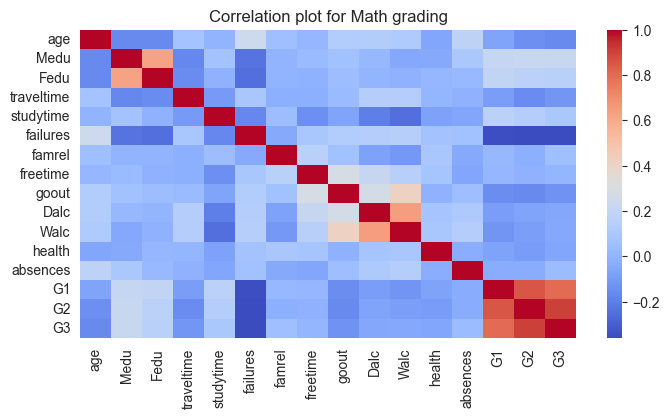

In [16]:
import seaborn as sb
int_cols = math.select_dtypes(include=[np.int64])

# select only the numeric columns
corr_matrix = int_cols.corr()

# Plot heatmap
sb.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation plot for Math grading")

Text(0.5, 1.0, 'Correlation plot for Portuguese  grading')

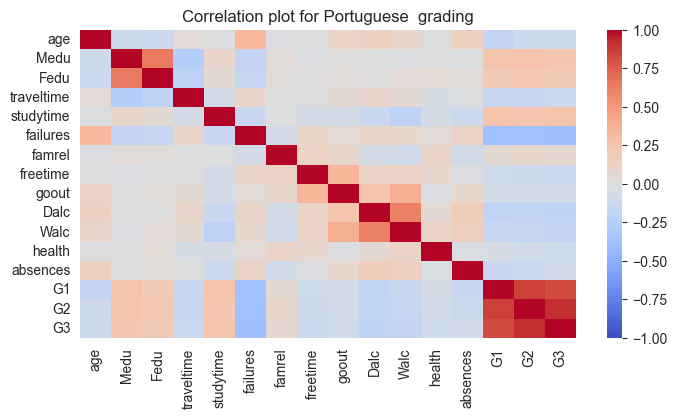

In [17]:
import seaborn as sb
int_cols = por.select_dtypes(include=[np.int64])

corr_matrix = int_cols.corr()
#print(corr_matrix)
# Plot heatmap
sb.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation plot for Portuguese  grading")

In [18]:
#Correlation analysis: F-test
#Hypothesis H0 : students performance in math and por have no difference

#F-test: F-test is the statistical test used to compare the variances of two or more samples or populations
#F = variation between sample means / variation within the samples


#import the library 
#pip install scipy
import scipy.stats as stats

#calculate the variance for math.G3 and por.G3
var1 = np.var(math.G3, ddof=1)
var2 = np.var(por.G3, ddof=1)

#calculat the f-stats
f_val = var1/var2

#Calculate the degrees of freedom: 

df1 = len(math.G3) - 1
df2 = len(por.G3) - 1

#calculate the p-value

p_val = stats.f.cdf(f_val, df1, df2)

print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_val)
print("p-value:", p_val)

#math.G3 and por.G3 have similar variance



Degree of freedom 1: 394
Degree of freedom 2: 648
F-statistic: 2.011050621356109
p-value: 0.9999999999999984


In [19]:
#Correlation analysis: F-test
#Hypothesis H0 : students performance in math and por have no difference

#F-test: F-test is the statistical test used to compare the variances of two or more samples or populations
#F = variation between sample means / variation within the samples


#import the library 
#pip install scipy
import scipy.stats as stats

#calculate the variance for math.G3 and por.G3
var1 = np.var(math.G3, ddof=1)
var2 = np.var(por.G3, ddof=1)

#calculat the f-stats
f_val = var1/var2

#Calculate the degrees of freedom: 

df1 = len(math.G3) - 1
df2 = len(por.G3) - 1

#calculate the p-value

p_val = stats.f.cdf(f_val, df1, df2)

print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_val)
print("p-value:", p_val)

#math.G3 and por.G3 have similar variance



Degree of freedom 1: 394
Degree of freedom 2: 648
F-statistic: 2.011050621356109
p-value: 0.9999999999999984


In [20]:
#make a correlation table

int_columns = math.select_dtypes(include="int64")


corr = int_columns.corr()
print(corr)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

In [22]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Feature Engineering & Model Selection (Week 2 & 3)

- Building new features, one hot encoding, feature scaling
- Handling outliers through statistical and heuristic methods
- Normalisation or Standardisation of input features is the ML algorithm in the pipeline requires it
- Model training, comparison and selection
- Model evaluation and Optimization using K-fold cross validation, hyperparameter tuning